# Recurrent Neural Networks

calcular o preço das ações do google

In [2]:
!pip install matplotlib

     |████████████████████████████████| 11.3 MB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 899 kB 131.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 10.0 MB/s eta 0:00:01


In [3]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = mms.fit_transform(training_set)

In [7]:
# Creating a data structure with 60 timesteps and 1 output (Many-to-One)
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [10]:
X_train.shape

(1198, 60, 1)

In [11]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [12]:
X_train.shape

(1198, 60, 1)

In [57]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 80, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 80))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
# regressor.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [58]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
19/19 [==============================] - 5s 82ms/step - loss: 0.0532 - accuracy: 0.0017
Epoch 2/100
19/19 [==============================] - 2s 82ms/step - loss: 0.0085 - accuracy: 0.0017
Epoch 3/100
19/19 [==============================] - 2s 81ms/step - loss: 0.0052 - accuracy: 0.0017
Epoch 4/100
19/19 [==============================] - 2s 81ms/step - loss: 0.0038 - accuracy: 0.0017
Epoch 5/100
19/19 [==============================] - 2s 81ms/step - loss: 0.0033 - accuracy: 0.0017
Epoch 6/100
19/19 [==============================] - 2s 81ms/step - loss: 0.0034 - accuracy: 0.0017
Epoch 7/100
19/19 [==============================] - 2s 81ms/step - loss: 0.0035 - accuracy: 0.0017
Epoch 8/100
19/19 [==============================] - 2s 80ms/step - loss: 0.0037 - accuracy: 0.0017
Epoch 9/100
19/19 [==============================] - 2s 80ms/step - loss: 0.0031 - accuracy: 0.0017
Epoch 10/100
19/19 [==============================] - 2s 80ms/step - loss: 0.0031 - accuracy: 0.0017

In [59]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
len(dataset_total)

1278

In [60]:
len(dataset_total) - len(dataset_test) - 60

1198

In [61]:
# Training dataset has 20 entries and its needed the previous historical 60 entries to input the model. 
# So after concatenate both sets take only the last 80 entries
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
len(inputs)

80

In [62]:
# Getting the predicted stock price of 2017
inputs = inputs.reshape(-1,1)
inputs = mms.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = mms.inverse_transform(predicted_stock_price)

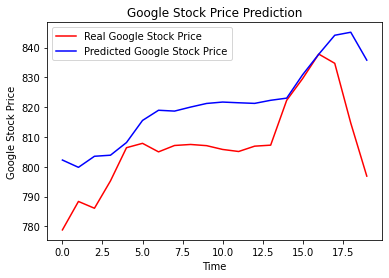

In [63]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()

plt.show()

## FIM